Title: Train a Classification Model (Logistic Regression)

Task 1: Email Spam Detection<br>
Dataset: Use a dataset containing labeled emails as spam or not-spam, with features such as word frequency.

Accuracy: 0.33
Confusion Matrix:
[[1 2]
 [0 0]]


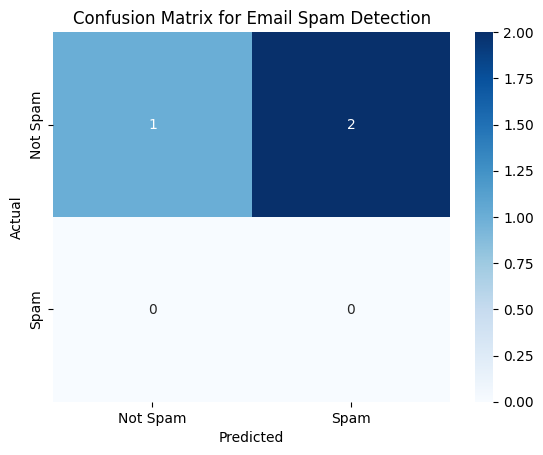

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset with word frequencies and spam labels
data = pd.DataFrame({
    'Word_Frequency_1': [5, 3, 1, 7, 6, 2, 9, 8, 2, 6],
        'Word_Frequency_2': [2, 1, 0, 4, 3, 1, 5, 4, 2, 3],
            'Word_Frequency_3': [6, 4, 3, 8, 7, 5, 9, 7, 6, 8],
                'Spam': [1, 0, 0, 1, 1, 0, 1, 1, 0, 1]  # 1 is spam, 0 is not spam
                })
X = data[['Word_Frequency_1', 'Word_Frequency_2', 'Word_Frequency_3']]
y = data['Spam']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix for Email Spam Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Task 2: Predicting Tumor Malignancy<br>
Dataset: Use a dataset that contains features from tumor datasets such as size and shape indicators.

Accuracy: 0.67
Confusion Matrix:
[[0 1]
 [0 2]]


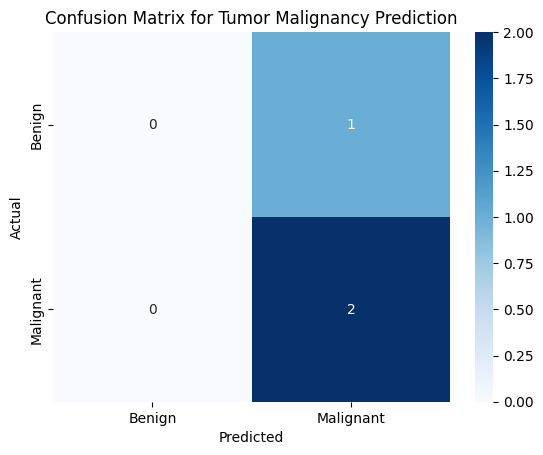

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset with tumor features (size and shape indicators) and malignancy label
data = pd.DataFrame({
    'Tumor_Size': [10, 12, 15, 7, 20, 14, 22, 9, 18, 16],
        'Shape_Indicator': [0.8, 0.75, 0.85, 0.65, 0.9, 0.78, 0.92, 0.77, 0.88, 0.81],
            'Malignant': [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 is malignant, 0 is benign
            })
X = data[['Tumor_Size', 'Shape_Indicator']]
y = data['Malignant']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix for Tumor Malignancy Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Task 3: Wine Quality Classification<br>
Dataset: Use a dataset that contains chemical properties of wine along with a quality rating.
Treat quality as a binary classification (high vs. low).

Class distribution: Quality_Binary
0    5
1    3
Name: count, dtype: int64
Class distribution in training set: Quality_Binary
0    3
1    2
Name: count, dtype: int64
Accuracy: 1.00
Confusion Matrix:
[[2 0]
 [0 1]]


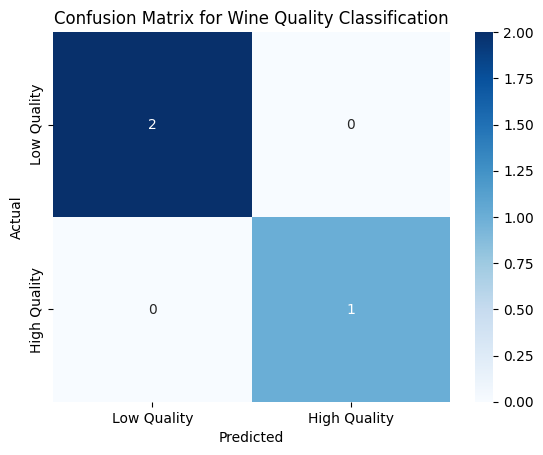

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted sample dataset with balanced classes
data = pd.DataFrame({
    'Fixed_Acidity': [7.4, 7.8, 7.8, 11.2, 7.4, 6.5, 8.1, 7.4],
        'Volatile_Acidity': [0.7, 0.88, 0.76, 0.28, 0.7, 0.66, 0.72, 0.7],
            'Citric_Acid': [0, 0.04, 0.04, 0.56, 0.01, 0.26, 0.32, 0.15],
                'Residual_Sugar': [1.9, 2.6, 2.3, 1.9, 1.6, 2.5, 2.0, 2.0],
                    'Chlorides': [0.076, 0.098, 0.092, 0.071, 0.076, 0.069, 0.076, 0.074],
                        'Quality': [5, 5, 5, 6, 5, 5, 6, 6]  # Wine quality ratings (5 is low quality, 6 is high quality)
                        })
# Convert 'Quality' to binary: 1 for high quality (>= 6) and 0 for low quality (< 6)
data['Quality_Binary'] = data['Quality'].apply(lambda x: 1 if x >= 6 else 0)

# Features and target
X = data.drop(['Quality', 'Quality_Binary'], axis=1)
y = data['Quality_Binary']

# Check the distribution of classes
print(f"Class distribution: {y.value_counts()}")

# Stratified sampling for train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check if both classes are present in the training set
print(f"Class distribution in training set: {y_train.value_counts()}")

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Low Quality", "High Quality"], yticklabels=["Low Quality", "High Quality"])
plt.title("Confusion Matrix for Wine Quality Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
